# **Sentiment Analysis on IMDB Movie Reviews**

## In this project, we will analyze the sentiment of movie reviews from the IMDB dataset. We will process the data, visualize it, and build a machine learning model to classify the sentiment of the reviews as positive or negative.

# **Step 1: Import Libraries**
### We start by importing the necessary libraries for data manipulation, visualization, and machine learning.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2: Load Dataset**
### We will load the IMDB movie reviews dataset into a Pandas DataFrame for analysis.

In [2]:
df=pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df["review"][0][0:200] # Displays the first 200 characters of the first review to get a sense of the text.

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was it"

# **Step 3: Explore the Data**
### Before processing, it’s important to understand the distribution of sentiments in the dataset.


In [4]:
df["sentiment"].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

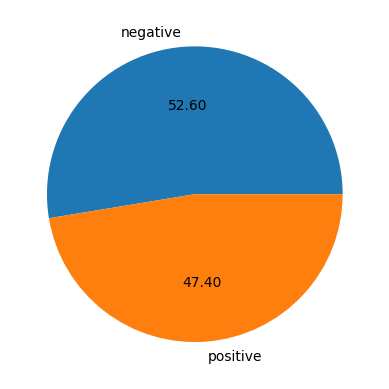

In [5]:
# representing target using pie chart
plt.pie(df["sentiment"].value_counts(),labels=["negative","positive"],autopct="%0.2f")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     500 non-null    object
 1   sentiment  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [7]:
df.describe()

,review,sentiment
count,500,500
unique,500,2
top,Such a joyous world has been created for us in...,negative
freq,1,263


In [8]:
df.drop_duplicates(inplace=True,keep="first") #Removes duplicate entries from the DataFrame to ensure the analysis is based on unique reviews.

# **Step 4: Data Cleaning**
### Next, we define a function to clean the reviews. This involves:
1. **Convert to Lowercase**: Ensures uniformity in text to avoid case sensitivity issues.
2. **Expand Contractions**: Transforms contracted forms (e.g., "don't") into their expanded versions ("do not").
3. **Remove HTML Tags**: Strips HTML tags using `BeautifulSoup` to keep only the text content.
4. **Remove Emojis**: Cleans out emojis using the `emoji` library to reduce noise.
5. **Remove URLs**: Removes web addresses that don't contribute to text analysis.
6. **Remove Mentions**: Strips `@username` mentions that are not useful in sentiment analysis.
7. **Remove Numbers**: Eliminates numbers that usually don't add meaning in text analysis.
8. **Remove Punctuation**: Removes punctuation to simplify the tokenization process.
9. **Tokenization**: Splits the text into individual words for easier processing.
10. **Loop for Stopwords Removal and Lemmatization**: 
    - Checks if the word is not a stopword.
    - Tags each word with its POS.
    - Converts the POS tag for lemmatization.
    - Lemmatizes each word for more accurate results.
11. **Rejoin Words**: Joins the processed words back into a single string, ready for further analysis.

In [9]:
import nltk 
import re  
import string 

In [10]:
# Download required NLTK data files (if not already downloaded)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Quratulain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Quratulain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Quratulain\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Quratulain\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Quratulain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Qur

True

### 1. **`punkt`**
- **Purpose**: `punkt` is a data package in NLTK that includes pre-trained models for tokenization. Tokenization is the process of splitting text into individual words or sentences. 
- **Why Needed**: It's essential when using functions like `nltk.word_tokenize()` to split text into words.
- **Example Usage**: `words = word_tokenize("This is a sentence.")` would break down into `['This', 'is', 'a', 'sentence', '.']`.

### 2. **`averaged_perceptron_tagger`**
- **Purpose**: This package is used for part-of-speech (POS) tagging. POS tagging involves labeling each word in a sentence with its grammatical role (e.g., noun, verb, adjective).
- **Why Needed**: It’s necessary for lemmatization when determining the correct form of a word. The POS tags help decide if a word should be lemmatized as a noun, verb, etc.
- **Example Usage**: `nltk.pos_tag(['This', 'is', 'a', 'sentence'])` could output `[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sentence', 'NN')]`.

### 3. **`wordnet`**
- **Purpose**: `wordnet` is a lexical database for the English language. It provides a structured vocabulary that helps in lemmatization and understanding word relationships.
- **Why Needed**: It is used in lemmatization to convert words to their base or dictionary form. For example, `running` would be lemmatized to `run` when correctly tagged as a verb.
- **Example Usage**: The `WordNetLemmatizer` requires `wordnet` for looking up word forms.
### 4. **`stopwords`**
- **Purpose**: This package contains a list of common stopwords in various languages (e.g., "the", "and", "in"). Stopwords are words that are typically ignored in text analysis because they don't contribute much to the overall meaning.
- **Why Needed**: It's used when removing stopwords from a text to simplify and focus on more meaningful words.
- **Example Usage**: `stopwords.words("english")` gives a list of common English stopwords.

# **Install Additional Libraries**

In [11]:
# install these libraries first
%pip install bs4
%pip install emoji
%pip install contractions

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Explanation:
- These libraries assist in text processing:
  - **BeautifulSoup**: For removing HTML tags.
  - **emoji**: For removing emojis.
  - **contractions**: For expanding contractions in text.

In [12]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import contractions 
import emoji 
from bs4 import BeautifulSoup 
from nltk.tokenize import word_tokenize 
from nltk.tag import pos_tag

## Explanation:
- **WordNetLemmatizer**: Used for lemmatizing words to their base forms.
- `contractions`, `emoji`, and `BeautifulSoup`: Libraries used for text cleaning as described earlier.

# **Initialize the lemmatizer**


In [13]:
lemmatizer = WordNetLemmatizer()

# **Function to Map NLTK POS Tags to WordNet POS Tags**

In [14]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

## **Explanation:**
- ### This function maps NLTK's POS tags to WordNet's POS tags, ensuring that lemmatization is accurate based on the grammatical role of each word.


# **A Complete Cleaning and Lemmatization Function**

In [15]:
def clean_reviews(review):
    # Convert to lowercase
    text = review.lower()
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    
    # Remove URLs
    text = re.sub(r"https\S+|www\.\S+http\S+", "", text)
    
    # Remove mentions
    text = re.sub(r"@[\w-]+", "", text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Removing stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    
    # POS tagging
    tagged_words = pos_tag(words)
    
    # Remove stopwords and lemmatize the words
    lemmatized_text=[]
    
    for word, pos in tagged_words:
        wordnet_pos = get_wordnet_pos(pos)
        lemitized_word = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatized_text.append(lemitized_word)
    
    # Join words back into a single string
    cleaned_text = " ".join(lemmatized_text)
    
    return cleaned_text

## **Explanation:**
- ### The `clean_reviews` function incorporates all the cleaning steps mentioned earlier and returns the cleaned and lemmatized text. This is essential for preparing the data for sentiment analysis.


# **Example of Using the Function**

In [16]:
input_text = "Congratulations! You got a free prize. Click on the link to get it."
cleaned_output = clean_reviews(input_text)
print("Cleaned text:", cleaned_output)

Cleaned text: congratulation get free prize click link get


# **Apply the Function to the DataFrame**

In [17]:
df['review'] = df['review'].apply(clean_reviews)
df.head()

,review,sentiment
0,one reviewer mention watch oz episode hook rig...,positive
1,wonderful little production film technique una...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive


## **Explanation:**
- #### This line applies the `clean_reviews` function to each review in the DataFrame, cleaning all the reviews before analysis.


# **Step 5: Visualize the Data**
### We will create word clouds to visualize the most common words in positive and negative reviews.


In [18]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from wordcloud import WordCloud

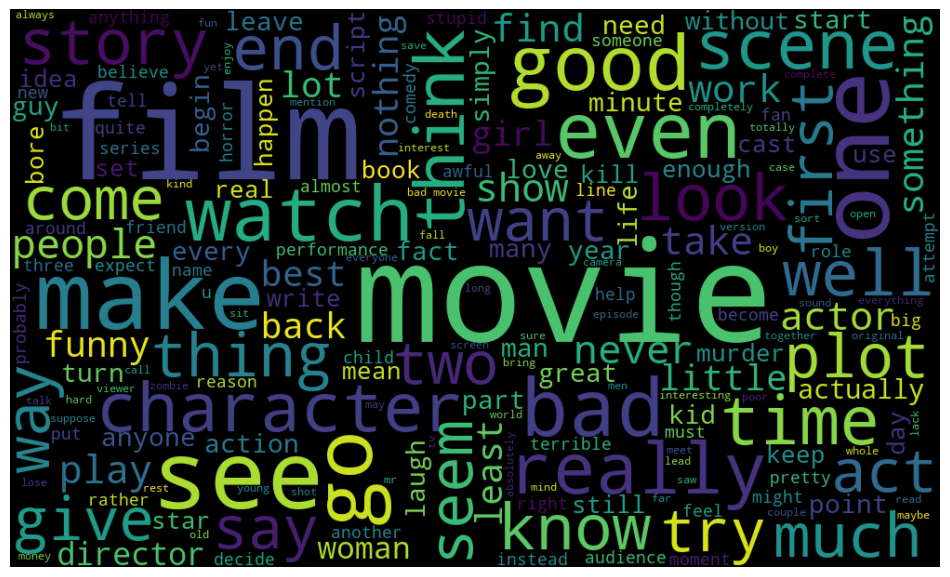

In [20]:
negative_reviews=" ".join(word for word in df["review"][df["sentiment"]=="negative"].astype("str"))
wordcloud=WordCloud(height=600,width=1000,max_font_size=150)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud.generate(negative_reviews),interpolation="bilinear")
plt.axis("off")
plt.show()

## **Explanation:**
- ### **WordCloud**: A library to create word cloud visualizations. This code generates a word cloud for negative reviews, showing the most frequent words visually.


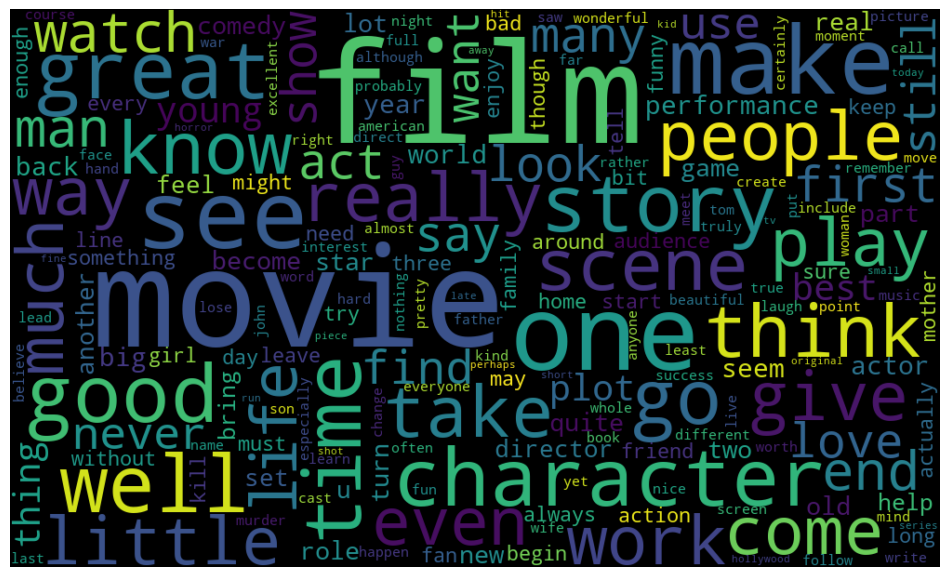

In [21]:
positive_review=" ".join(word for word in df["review"][df["sentiment"]=="positive"].astype(str))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud.generate(positive_review),interpolation="bilinear")
plt.axis("off")
plt.show()

## **Explanation:**
- ### Similar to the previous step, this code generates a word cloud for positive reviews, providing insights into commonly used

# **Step 6: Preparing Data for Model Training**

## **Converting Categorical data to numeric**

In [22]:
df["sentiment"] = df["sentiment"].replace(["positive", "negative"], [1, 0]).astype(int)

C:\Users\Quratulain\AppData\Local\Temp\ipykernel_2500\2469866296.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentiment"] = df["sentiment"].replace(["positive", "negative"], [1, 0]).astype(int)


In [23]:
df

,review,sentiment
0,one reviewer mention watch oz episode hook rig...,1
1,wonderful little production film technique una...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter matteis love time money visually stunni...,1
...,...,...
495,american nightmare officially tied opinion pat...,0
496,first say love book animal farm read th grade ...,0
497,movie extremely boring laugh time decide rent ...,0
498,disgust movie graphic sex scene ruin image art...,0


# **Converting text data numeric using tfidf vectorizer/ CountVectorizer**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [25]:
vectorizer = TfidfVectorizer(max_features=2000)

In [26]:
reviews=vectorizer.fit_transform(df["review"]).toarray()

In [27]:
count_vectorizer=CountVectorizer(max_features=2000)

In [28]:
reviews=count_vectorizer.fit_transform(df["review"]).toarray()

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a way to evaluate how important a word is in a document relative to a collection of documents (corpus). 

- **Term Frequency (TF)** counts how often a word appears in a document. 
- **Inverse Document Frequency (IDF)** measures how unique or rare that word is across all documents. 

For example, in a corpus of three documents:
1. "The cat sits."
2. "The dog barks."
3. "The cat and dog play."

The word "cat" may have a high TF in Document 1 but a low IDF since it appears in both Document 1 and Document 3. Thus, its TF-IDF score will reflect its significance in Document 1 compared to others.

In [29]:
reviews

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], shape=(500, 2000))

# **Step 7: Converting data into training and testing sets**
### Finally, we will build a machine learning model to classify the sentiment of the reviews.


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Splitting the dataset into training and testing sets
X = reviews
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(y_train.shape)

(400, 2000)
(400,)


# **Choosing some models for classification problem**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,precision_score

In [34]:
    LR=LogisticRegression()
    SVM=SVC()
    KNN=KNeighborsClassifier()
    DT=DecisionTreeClassifier()
    RF=RandomForestClassifier()
    GNB=GaussianNB()
    BNB=BernoulliNB()
    MNB=MultinomialNB()

In [35]:
models={
    "LogisticRegression":LR,
    "SVC":SVM,
    "KNeighborsClassifier":KNN,
    "DecisionTreeClassifier":DT,
    "RandomForestClassifier":RF,
    "GaussianNB":GNB,
    "BernoulliNB":BNB,
    "MultinomialNB":MNB
}

In [36]:
def trainModel(model,Xtrain,Xtest,ytrain,ytest):

        model.fit(Xtrain,ytrain)
        y_pred=model.predict(Xtest)

        a=accuracy_score(ytest,y_pred)
        p=precision_score(ytest,y_pred)
        r=recall_score(ytest,y_pred)

        return a,p,r

In [37]:
models_names=[]
accuracy=[]
precision=[]
recall=[]

for name,model in models.items():
    a,p,r=trainModel(model,X_train,X_test,y_train,y_test)
    models_names.append(name)
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    

In [38]:
data={
    "Model":models_names,
    "Accuracy":accuracy,
    "Precision":precision,
    "Recall":recall
}
performance_df=pd.DataFrame(data)

In [39]:
performance_df.sort_values(by="Precision",ascending=False)

,Model,Accuracy,Precision,Recall
7,MultinomialNB,0.80,0.904762,0.703704
0,LogisticRegression,0.84,0.895833,0.796296
4,RandomForestClassifier,0.75,0.871795,0.629630
6,BernoulliNB,0.72,0.861111,0.574074
1,SVC,0.74,0.850000,0.629630
3,DecisionTreeClassifier,0.67,0.705882,0.666667
2,KNeighborsClassifier,0.51,0.592593,0.296296
5,GaussianNB,0.53,0.585366,0.444444


In [40]:
# Melt the DataFrame for easier plotting with seaborn
performance_df_melted = performance_df.melt(id_vars="Model", var_name="Metric", value_name="value")

In [41]:
performance_df_melted

,Model,Metric,value
0,LogisticRegression,Accuracy,0.840000
1,SVC,Accuracy,0.740000
2,KNeighborsClassifier,Accuracy,0.510000
3,DecisionTreeClassifier,Accuracy,0.670000
4,RandomForestClassifier,Accuracy,0.750000
5,GaussianNB,Accuracy,0.530000
6,BernoulliNB,Accuracy,0.720000
7,MultinomialNB,Accuracy,0.800000
8,LogisticRegression,Precision,0.895833
9,SVC,Precision,0.850000


<Figure size 1200x600 with 0 Axes>

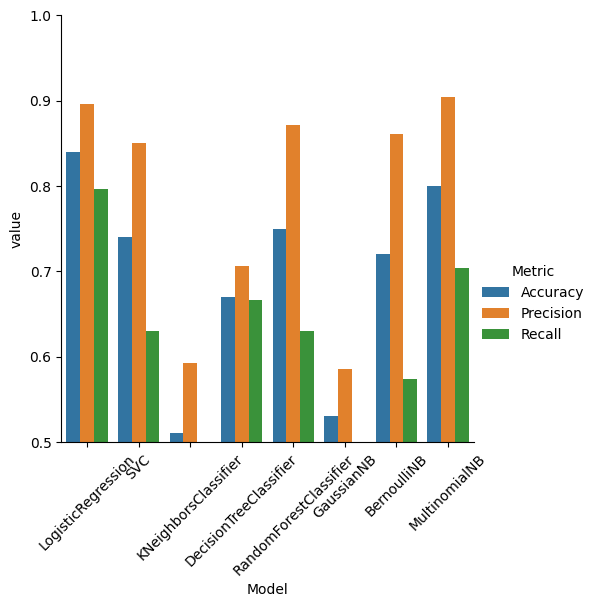

In [42]:
plt.figure(figsize=(12,6))
sns.catplot(x="Model", y="value", hue="Metric", data=performance_df_melted, kind="bar", height=5)
plt.xticks(rotation=45)
plt.ylim(0.5,1.0)
plt.show()

# **Combining The Top 3 Best Classifiers To Increase Performance More By Voting Classifier**
### A Voting Classifier combines the predictions of multiple models to improve classification accuracy. It aggregates the outputs using a specified voting method (e.g., soft or hard voting), leveraging the strengths of each model to make a final prediction.

In [43]:
performance_df.sort_values(by="Precision",ascending=False)

,Model,Accuracy,Precision,Recall
7,MultinomialNB,0.80,0.904762,0.703704
0,LogisticRegression,0.84,0.895833,0.796296
4,RandomForestClassifier,0.75,0.871795,0.629630
6,BernoulliNB,0.72,0.861111,0.574074
1,SVC,0.74,0.850000,0.629630
3,DecisionTreeClassifier,0.67,0.705882,0.666667
2,KNeighborsClassifier,0.51,0.592593,0.296296
5,GaussianNB,0.53,0.585366,0.444444


In [44]:
from sklearn.ensemble import VotingClassifier

In [45]:
mnb=MultinomialNB()
lr=LogisticRegression()
svc=SVC(probability=True)
rf=RandomForestClassifier()

In [46]:
Vmodel=VotingClassifier(estimators=[("rf",rf),("Lr",lr),("mnb",mnb)],voting="hard")

In [47]:
Vmodel.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('Lr', LogisticRegression()),
                             ('mnb', MultinomialNB())])

In [48]:
y_pred=model.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)
Precision=precision_score(y_test,y_pred)
Recall=recall_score(y_test,y_pred)

print("Accuracy: ",Accuracy)
print("Precision: ",Precision)
print("Recall: ",Recall)


Accuracy:  0.8
Precision:  0.9047619047619048
Recall:  0.7037037037037037


# **Stacking Classifier**
### A Stacking Classifier combines multiple base models to enhance predictive performance by using their individual strengths. It trains a final estimator on the predictions of the base models, allowing for more complex decision-making and often resulting in improved accuracy compared to single models.

In [49]:
from sklearn.ensemble import StackingClassifier

In [50]:
mnb=MultinomialNB()
lr=LogisticRegression()
rf=RandomForestClassifier()
svc=SVC(probability=True)
bnb=BernoulliNB()

In [51]:
Smodel=StackingClassifier(estimators=[("mnb",mnb),("lr",lr),("bnb",bnb)],final_estimator=rf)

In [52]:
Smodel.fit(X_train,y_train)

StackingClassifier(estimators=[('mnb', MultinomialNB()),
                               ('lr', LogisticRegression()),
                               ('bnb', BernoulliNB())],
                   final_estimator=RandomForestClassifier())

In [53]:
y_pred=Smodel.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)
Precision=precision_score(y_test,y_pred)
Recall=recall_score(y_test,y_pred)

print("Accuracy: ",Accuracy)
print("Precision: ",Precision)
print("Recall: ",Recall)

Accuracy:  0.78
Precision:  0.8333333333333334
Recall:  0.7407407407407407


# **Selecting Best Model and save it** 

In [54]:
best_model=Vmodel # voting classifier

In [55]:
def clean_reviews(review):
    # Convert to lowercase
    text = review.lower()
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    
    # Remove URLs
    text = re.sub(r"https\S+|www\.\S+http\S+", "", text)
    
    # Remove mentions
    text = re.sub(r"@[\w-]+", "", text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Removing stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    
    # POS tagging
    tagged_words = pos_tag(words)
    
    # Remove stopwords and lemmatize the words
    lemmatized_text=[]
    
    for word, pos in tagged_words:
        wordnet_pos = get_wordnet_pos(pos)
        lemitized_word = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatized_text.append(lemitized_word)
    
    # Join words back into a single string
    cleaned_text = " ".join(lemmatized_text)
    
    return cleaned_text

In [56]:
def sentiment_check(text):
        
        cleaned_text=clean_reviews(text)
        
        if not cleaned_text:
            return None
        else:
            text_vector=count_vectorizer.transform([cleaned_text]).toarray()
            result=Vmodel.predict(text_vector)
            return result

In [57]:
def validate_input(text):
        if not text:
                return "Review cannot be empty."
        if len(text) < 10:
                return "Review must be at least 10 characters long."

In [58]:
review="movie is not good "
val_message=validate_input(review)
if val_message:
    print(val_message)
else:
    result=sentiment_check(review)
    if result is None:
           print("Review cannot be empty/containing special characters/links/numbers")
    elif result==1:
            print("Positive Review")
    elif result==0:
            print("Negative Review")

Negative Review


# **Save the Model**
### Finally, we save the trained model and the vectorizer for future use.

In [59]:
import joblib

In [60]:
joblib.dump(Vmodel,"model.joblib")

['model.joblib']

In [61]:
joblib.dump(count_vectorizer,"vectorizer.joblib")

['vectorizer.joblib']


# **Conclusion**
### This project illustrates the process of sentiment analysis using natural language processing techniques, from data cleaning to model evaluation. By following these steps, you can analyze and predict sentiments in various text datasets.

